Intalar a biblioteca Optimization with PuLP

In [1]:
%pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pulp import *

Vamos definir o Problema

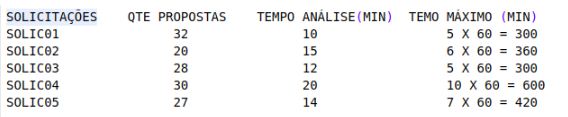

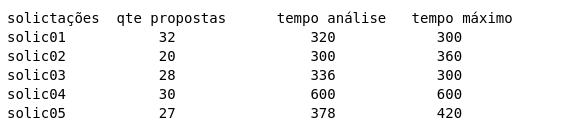

Considere a mesma restrição de 12 minutos como um estoque em cada proposta, margem de tempo. Observe que cada SOLIC01 = x11; SOLIC02 = x22 e assim por diante

In [3]:
problema1 = LpProblem('Leitura', LpMinimize)

Definir as variáveis do problema

In [4]:
x11 = LpVariable('x11',lowBound = 0)
x12 = LpVariable('x12',lowBound = 0)
x13 = LpVariable('x13',lowBound = 0)
x14 = LpVariable('x14',lowBound = 0)
x15 = LpVariable('x15',lowBound = 0)
x22 = LpVariable('x22',lowBound = 0)
x23 = LpVariable('x23',lowBound = 0)
x24 = LpVariable('x24',lowBound = 0)
x25 = LpVariable('x25',lowBound = 0)
x33 = LpVariable('x33',lowBound = 0)
x34 = LpVariable('x34',lowBound = 0)
x35 = LpVariable('x35',lowBound = 0)
x44 = LpVariable('x44',lowBound = 0)
x45 = LpVariable('x45',lowBound = 0)
x55 = LpVariable('x55',lowBound = 0)

Quantas propostas podem ser lidas por hora?

Definir a função objetivo, está relacionado ao custo definido incialmente

In [5]:
problema1 += 300*x11 + 312*x12 + 324*x13 + 336*x14 + 348*x15 + 360*x22 + 372*x23 + 384*x24 + 396*x25 + 300*x33 + 312*x34 + 324*x35 + 600*x44 + 612*x45 + 420*x55


Definir as restrições

In [6]:
problema1 += x11 + x12 + x13 + x14 + x15  <= 320
problema1 += x22 + x23 + x24 + x25  <= 300
problema1 += x33 + x34 + x35 <= 336
problema1 += x44 + x45 <= 600
problema1 += x55 <= 378
problema1 += x11 == 32
problema1 += x12 + x22 == 20
problema1 += x13 + x23 +x33  == 28
problema1 += x14 + x24 + x34 + x44 == 30
problema1 += x15 + x25 + x35 + x45 + x55 == 27


In [7]:
problema1

Leitura:
MINIMIZE
300*x11 + 312*x12 + 324*x13 + 336*x14 + 348*x15 + 360*x22 + 372*x23 + 384*x24 + 396*x25 + 300*x33 + 312*x34 + 324*x35 + 600*x44 + 612*x45 + 420*x55 + 0
SUBJECT TO
_C1: x11 + x12 + x13 + x14 + x15 <= 320

_C2: x22 + x23 + x24 + x25 <= 300

_C3: x33 + x34 + x35 <= 336

_C4: x44 + x45 <= 600

_C5: x55 <= 378

_C6: x11 = 32

_C7: x12 + x22 = 20

_C8: x13 + x23 + x33 = 28

_C9: x14 + x24 + x34 + x44 = 30

_C10: x15 + x25 + x35 + x45 + x55 = 27

VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x33 Continuous
x34 Continuous
x35 Continuous
x44 Continuous
x45 Continuous
x55 Continuous

In [8]:
problema1.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/consultor/.asdf/installs/python/3.12.7/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/9034090c01484dddb36e2c713e3ed998-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/9034090c01484dddb36e2c713e3ed998-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 61 RHS
At line 72 BOUNDS
At line 73 ENDATA
Problem MODEL has 10 rows, 15 columns and 30 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 7 (-3) rows, 13 (-2) columns and 25 (-5) elements
0  Obj 16800 Primal inf 84.999997 (3) Dual inf 47.999999 (1)
3  Obj 42348
Optimal - objective value 42348
After Postsolve, objective 42348, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 42348 - 3 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU sec

1

In [9]:
for v in problema1.variables():
    print(v.name, "=", v.varValue)

x11 = 32.0
x12 = 20.0
x13 = 0.0
x14 = 0.0
x15 = 0.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x33 = 28.0
x34 = 30.0
x35 = 27.0
x44 = 0.0
x45 = 0.0
x55 = 0.0


In [10]:
print('tempo total horas = '), value(problema1.objective)/60

tempo total horas = 


(None, 705.8)